In [31]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay


In [32]:
##Cargar los datos
ruta_archivo = '../proyecto2/data/Student_performance_data _dt3.csv'
df = utils.cargar_datos(ruta_archivo)
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [33]:
##Exploracion incial
utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


Este dataset cuenta con 2392 filas y 15 columnas y de acuerdo a su distribución de valores se puede observar lo siguiente:
* Las variables categóricas como Gender, Ethnicity, y otras binarias tienen valores que indican una alta proporción de ceros.
* Los datos numéricos presentan una dispersión razonable, excepto en algunas variables donde los valores están sesgados hacia ciertos valores comunes. 

In [34]:
na_df = utils.identificar_valores_faltantes(df)
print(na_df)
utils.verificacion_elementos_duplicados(df)


Valores faltantes en el dataset
                   datos sin NAs en q  Na en q  Na en %
StudentID                        2392        0      0.0
Age                              2392        0      0.0
Gender                           2392        0      0.0
Ethnicity                        2392        0      0.0
ParentalEducation                2392        0      0.0
StudyTimeWeekly                  2392        0      0.0
Absences                         2392        0      0.0
Tutoring                         2392        0      0.0
ParentalSupport                  2392        0      0.0
Extracurricular                  2392        0      0.0
Sports                           2392        0      0.0
Music                            2392        0      0.0
Volunteering                     2392        0      0.0
GPA                              2392        0      0.0
GradeClass                       2392        0      0.0
Cantidad de filas duplicadas:  0


##### No se encuentran valores nulos, duplicados o con caracteres especiales como '?'

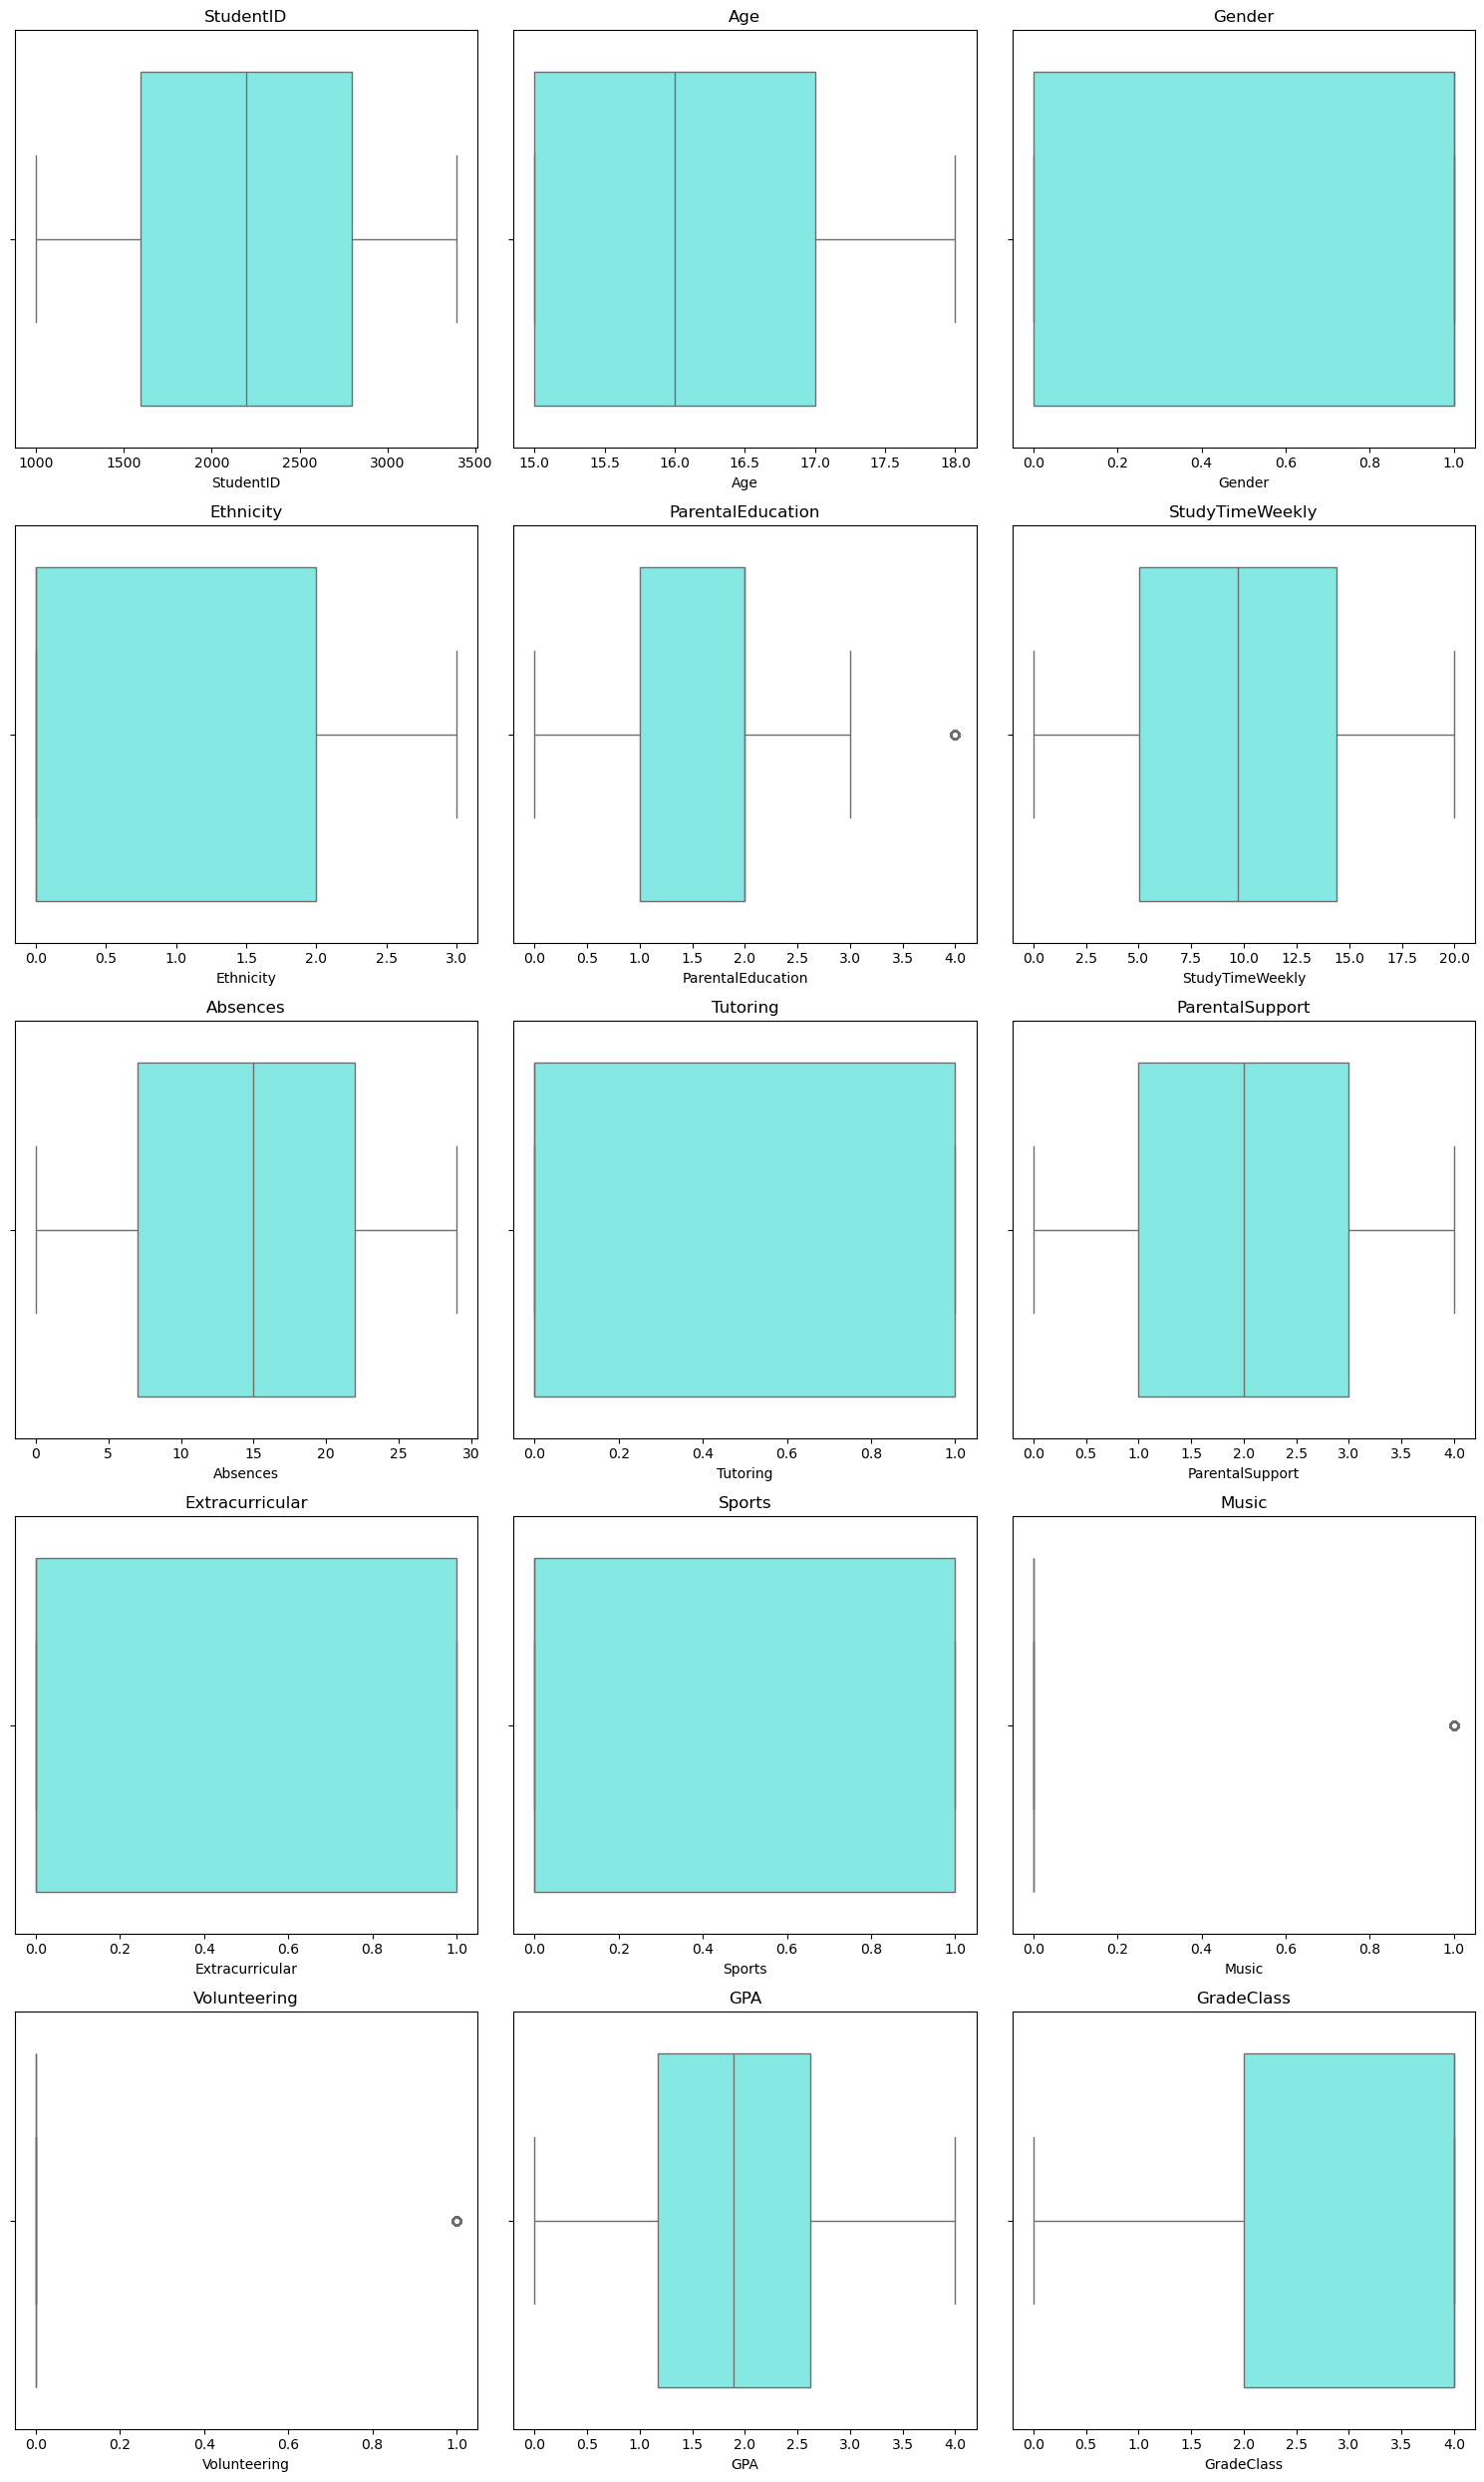

In [35]:
num_features = df.select_dtypes(include=['int64', 'float64'])
utils.plot_grafico_outliers(num_features,5,3,df)

##### Se puede ver que las diferentes variables no cuentan con valores atipicos significativos, ya que en su mayoria son datos categoricos con valores 0 y 1 por lo que algunos outliers se presentan ya que algunas variables tienen predominancia del valor 0.

In [36]:
df['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

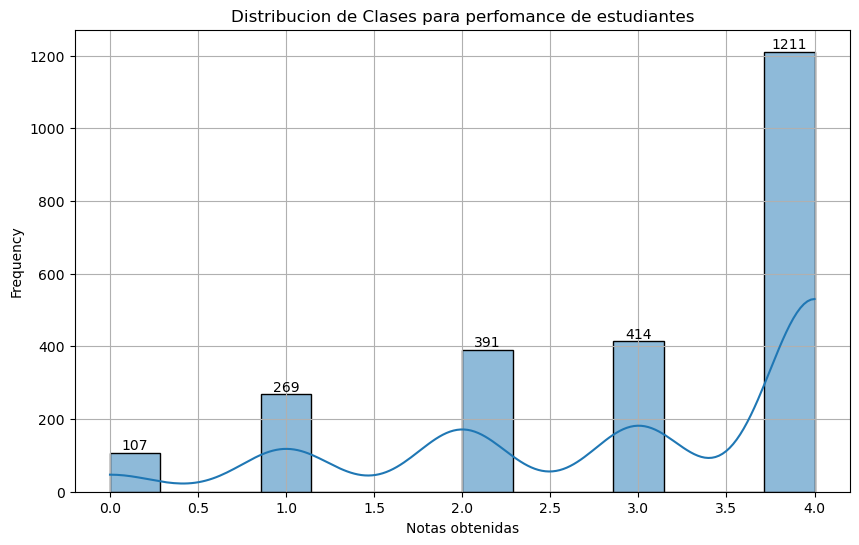

In [37]:
## Exploracion de datos
# Distribucion de la clase
plt.figure(figsize=(10, 6))
# Crear el histograma y almacenar la salida en una variable
hist = sns.histplot(df['GradeClass'], kde=True)
# Agregar los valores encima de las barras
for patch in hist.patches:  # Iterar sobre las barras
    x = patch.get_x() + patch.get_width() / 2  # Centro de la barra
    y = patch.get_height()  # Altura de la barra
    if y > 0:  # Mostrar solo si la frecuencia no es cero
        plt.text(x, y, int(y), ha='center', va='bottom', fontsize=10)
plt.title('Distribucion de Clases para perfomance de estudiantes')
plt.xlabel('Notas obtenidas')
plt.ylabel('Frequency')
plt.grid()
plt.show()

##### Podemos observar que de la clase target GradeClass existe una gran mayoria con grado 4 con un total de 1211, seguida de 3 y 2 con valores aproximadamente similares de 414 y 391, finalmente con valores menores se encuentran los grados 1 y o con 269 y 107 respectivamente. Se puede concluir que no es una clase balanceada, pero era de esperarse en targets que no son binomiales.

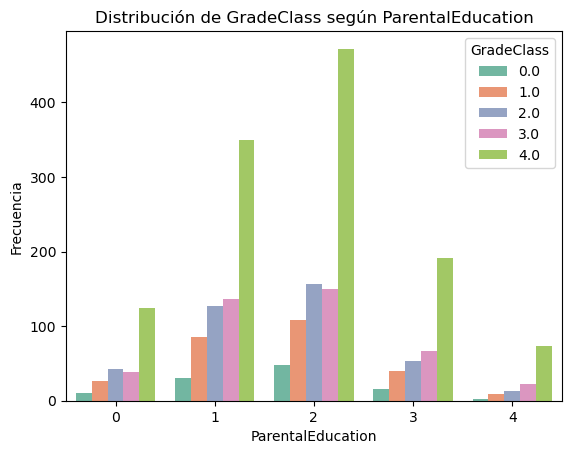

In [38]:
# Crear un gráfico de barras agrupado
sns.countplot(data=df, x='ParentalEducation', hue='GradeClass', palette='Set2')

# Etiquetas y título
plt.title("Distribución de GradeClass según ParentalEducation")
plt.xlabel("ParentalEducation")
plt.ylabel("Frecuencia")
plt.legend(title="GradeClass")
plt.show()


##### Este grafico muestra la relacion de la educacion de los padres 0 sin estudios, 1 secundario, 2 universitarios incompleto o curso superior, 3 universitario, 4 postgrados. Lo que podemos observar en este grafico es que en su gran mayoria son parecidos con mayor incidencia de notas altas en los tipos 2 seguido del 3. Sin embargo, ya que las distribuciones son muy parejas no se ven que sean una variable fuerte para determinar el grado de un estudiante.  

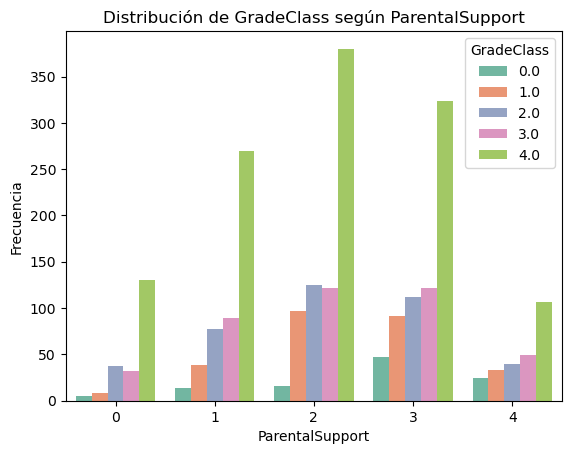

In [39]:
# Crear un gráfico de barras agrupado
sns.countplot(data=df, x='ParentalSupport', hue='GradeClass', palette='Set2')

# Etiquetas y título
plt.title("Distribución de GradeClass según ParentalSupport")
plt.xlabel("ParentalSupport")
plt.ylabel("Frecuencia")
plt.legend(title="GradeClass")
plt.show()

##### Para este caso se puede ver que el soporte de los padres influye en cierta manera a los grados de estudiantes 0 sin apoyo, 1 bajo, 2 moderado, 3 alto, 4 muy alto. Por lo que podemos asumir que el apoyo moderado y alto tiene en algun grado de relacion con el grado de los estudiantes.

Parte 2: Selección de Técnica de Machine Learning

- Entrenamiento Inicial:
    * Entrenar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost, LGBM).
    * Evaluar los modelos utilizando validación cruzada y seleccionar el modelo con el mejor rendimiento inicial.
- Comparación de Modelos:
    * Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, ROC-AUC, etc.).
    * Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.




In [40]:
# Definir X e y. Dividir los datos en conjunto de entrenamiento y prueba

X = df.drop(['GradeClass'], axis=1)
y = df['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
### No existen valores nulos que deban tratarse pero si valores outliers que seran escalados con RobustScaler ya que se encuentran valores outliers en BMI y charges
###Pipeline para preprocesamiento de valores
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Get column names
categorical_features = X.select_dtypes(include=['object']).columns.tolist() # Get column names
# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Crear transformer para columnas categóricas con imputación
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar categorías
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Integrar en un pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Crear y aplicar el pipeline a los datos de entrenamiento
X_train_transformed = pipeline.fit_transform(X_train)

# Aplicar la misma transformación a los datos de prueba (sin hacer fit)
X_test_transformed = pipeline.transform(X_test)

print("Preprocesamiento completado. Datos transformados listos para modelar.")

Preprocesamiento completado. Datos transformados listos para modelar.


In [42]:
# Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Evaluación con validación cruzada
cv_results = {}
for model_name, model in models.items():
    # Validación cruzada con scoring de 'accuracy'
    scores = cross_val_score(model, X_train_transformed , y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"{model_name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Comparar los resultados
import pandas as pd
cv_summary = pd.DataFrame(cv_results).T
cv_summary.columns = [f'Fold {i+1}' for i in range(cv_summary.shape[1])]
cv_summary['Mean Accuracy'] = cv_summary.mean(axis=1)
cv_summary['Std Dev'] = cv_summary.std(axis=1)
print("\nResumen de Validación Cruzada:")
print(cv_summary)


Logistic Regression: Mean Accuracy = 0.7632, Std = 0.0137
K-Nearest Neighbors: Mean Accuracy = 0.6388, Std = 0.0268
Decision Tree: Mean Accuracy = 0.9300, Std = 0.0091

Resumen de Validación Cruzada:
                       Fold 1    Fold 2    Fold 3    Fold 4    Fold 5  \
Logistic Regression  0.751958  0.775457  0.746736  0.782723  0.759162   
K-Nearest Neighbors  0.639687  0.681462  0.610966  0.609948  0.651832   
Decision Tree        0.919060  0.937337  0.919060  0.939791  0.934555   

                     Mean Accuracy   Std Dev  
Logistic Regression       0.763207  0.013748  
K-Nearest Neighbors       0.638779  0.026825  
Decision Tree             0.929960  0.009053  


Parte 3: Optimización de Hiperparámetros

- GridSearchCV:
    * Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.
    * Definir el espacio de búsqueda para los hiperparámetros relevantes.
- RandomizedSearchCV:
    * Implementar RandomizedSearchCV para realizar una búsqueda aleatoria de los mejores hiperparámetros, especialmente útil si el espacio de búsqueda es grande.
- Optuna:
    * Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.
    Evaluación de Modelos Optimizados:
    * Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba.
    * Comparar el rendimiento del modelo optimizado con el modelo inicial.


In [43]:
##Gridsearch
# Espacio de búsqueda para cada modelo
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_dt = {
    'max_depth': [1, 3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [44]:
# Crear los modelos base
models = {
    'LogisticRegression': (LogisticRegression(random_state=42), param_grid_lr),
    'KNN': (KNeighborsClassifier(), param_grid_knn),
    'DecisionTree': (DecisionTreeClassifier(random_state=42), param_grid_dt)
}

# Realizar GridSearchCV para cada modelo
grid_results = {}
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train)
    grid_results[name] = {
        'Best Params': grid_search.best_params_,
        'Best Score': grid_search.best_score_
    }

# Mostrar los resultados de GridSearchCV
import pandas as pd
grid_summary = pd.DataFrame(grid_results).T
print("Resultados de GridSearchCV:")
print(grid_summary)

Resultados de GridSearchCV:
                                                          Best Params  \
LogisticRegression     {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}   
KNN                 {'metric': 'manhattan', 'n_neighbors': 9, 'wei...   
DecisionTree        {'criterion': 'entropy', 'max_depth': None, 'm...   

                   Best Score  
LogisticRegression   0.773662  
KNN                  0.710928  
DecisionTree         0.931008  


Parte 3: Optimización de Hiperparámetros

- GridSearchCV:
    * Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.
    * Definir el espacio de búsqueda para los hiperparámetros relevantes.
- RandomizedSearchCV:
    * Implementar RandomizedSearchCV para realizar una búsqueda aleatoria de los mejores hiperparámetros, especialmente útil si el espacio de búsqueda es grande.
- Optuna:
    * Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.
    Evaluación de Modelos Optimizados:
    * Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba.
    * Comparar el rendimiento del modelo optimizado con el modelo inicial.


In [45]:
###RandomizerSearch
# Espacio de búsqueda para RandomizedSearchCV
random_grid_lr = {
    'C': randint(1, 100),
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': randint(100, 500)
}

random_grid_knn = {
    'n_neighbors': randint(3, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

random_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

# Asociar los modelos con sus espacios de parámetros para RandomizedSearchCV
random_models = {
    'LogisticRegression': (LogisticRegression(random_state=42), random_grid_lr),
    'KNN': (KNeighborsClassifier(), random_grid_knn),
    'DecisionTree': (DecisionTreeClassifier(random_state=42), random_grid_dt)
}

# Realizar RandomizedSearchCV para cada modelo
random_results = {}
for name, (model, random_grid) in random_models.items():
    random_search = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=50, 
                                    cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
    random_search.fit(X_train_transformed, y_train)
    random_results[name] = random_search

# Crear DataFrame con los mejores resultados
results_data = {
    name: {
        'Best Params': random_search.best_params_,
        'Best Score': random_search.best_score_
    }
    for name, random_search in random_results.items()
}

results_df = pd.DataFrame(results_data).T
print(results_df)


                                                          Best Params  \
LogisticRegression      {'C': 52, 'max_iter': 448, 'solver': 'lbfgs'}   
KNN                 {'metric': 'manhattan', 'n_neighbors': 9, 'wei...   
DecisionTree        {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

                   Best Score  
LogisticRegression   0.773662  
KNN                  0.710928  
DecisionTree         0.935707  


In [46]:
###Comparar resultados
comparison = pd.concat([grid_summary['Best Score'], results_df['Best Score']], axis=1)
comparison.columns = ['GridSearchCV', 'RandomizedSearchCV']
print("Comparación de GridSearchCV y RandomizedSearchCV:")
print(comparison)

Comparación de GridSearchCV y RandomizedSearchCV:
                   GridSearchCV RandomizedSearchCV
LogisticRegression     0.773662           0.773662
KNN                    0.710928           0.710928
DecisionTree           0.931008           0.935707


In [47]:
# Obtener los mejores modelos de RandomizedSearchCV
optimized_lr = random_results['LogisticRegression'].best_estimator_
optimized_knn = random_results['KNN'].best_estimator_
optimized_dt = random_results['DecisionTree'].best_estimator_

# Supongamos que ya tenemos los mejores modelos optimizados
best_models = {
    'LogisticRegression': optimized_lr,  # modelo entrenado
    'KNN': optimized_knn,                # modelo entrenado
    'DecisionTree': optimized_dt         # modelo entrenado
}


# Evaluación y almacenamiento de métricas
evaluation_results = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test_transformed)
    y_pred_proba = model.predict_proba(X_test_transformed) if hasattr(model, "predict_proba") else None

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # 'macro' para multiclase
    recall = recall_score(y_test, y_pred, average='macro')        # 'macro' para multiclase
    f1 = f1_score(y_test, y_pred, average='macro')                # 'macro' para multiclase

    # Calcular ROC-AUC si aplica
    if y_pred_proba is not None:
        if y_pred_proba.ndim == 2:  # Salida bidimensional para multiclase
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # O 'ovo'
        else:
            roc_auc = "N/A"  # No se puede calcular ROC-AUC con una dimensión
    else:
        roc_auc = "N/A"

    # Almacenar resultados
    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Convertir resultados a DataFrame para análisis
import pandas as pd
evaluation_df = pd.DataFrame(evaluation_results).T
print("Evaluación de Modelos:")
print(evaluation_df)


Evaluación de Modelos:
                    Accuracy  Precision    Recall  F1-Score   ROC-AUC
LogisticRegression  0.739040   0.636993  0.565179  0.570346  0.900913
KNN                 0.672234   0.547515  0.482977  0.486906  0.859566
DecisionTree        0.924843   0.895445  0.880395  0.887045  0.969322


### Decision tree se ve como la mejor opcion de modelo para este caso